Tasks to perform
Read in the file and get basic information about the data, including numerical summaries.
    - Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?
    - Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?
    - Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?
    - Make a box plot for pdays. Do you see any outliers?
The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”.
First, perform bi-variate analysis to identify the features that are directly associated with the target variable. You can refer to the notebook we used for the EDA discussion.
    - Convert the response variable to a convenient form
    - Make suitable plots for associations with numerical features and categorical features’
Are the features about the previous campaign data useful?
Are pdays and poutcome associated with the target? 
If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision.
Before the predictive modeling part, make sure to perform –
    - The necessary transformations for the categorical variables and the numeric variables
    - Handle variables corresponding to the previous campaign
    - Train test split
Predictive model 1: Logistic regression
    - Make a predictive model using logistic regression
    - Use RFE to select top n features in an automated fashion (choose n as you see fit)
    - Using p values and VIF, get rid of the redundant features
    - Estimate the model performance using k fold cross validation
    - What is the precision, recall, accuracy of your model?
    - Which features are the most important from your model?
Predictive model 2: Random Forest
    - Make a predictive model using random forest technique
    - Use not more than 50 trees, and control the depth of the trees to prevent overfitting
    - Estimate the model performance using k fold cross validation
    - What is the precision, recall, accuracy of your model?
    - Using the feature importance values from the Random Forest module, identify the most important features for the model
Compare the performance of the Random Forest and the logistic model – 
    - Evaluate both models on the test set
    - Which metric did you choose and why?
    - Which model has better performance on the test set? 
    - Compare the feature importance from the different models – do they agree? Are the top features similar in both models?


# Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%time
import warnings
warnings.filterwarnings("ignore")
from statistics import mean

Wall time: 0 ns


# Viewing data

In [2]:
df = pd.read_csv('bank-marketing.csv')
print(df.shape)
df.head()

(45211, 19)


,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA

In [3]:
# checking for null values
print(df.columns)
df.isnull().sum()
# there is no null values

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')


age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [4]:
df['response'].value_counts()

no     39922
yes     5289
Name: response, dtype: int64

In [5]:
for i in df.columns:
    print (i)
    print(df[i].unique())

age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
salary
[100000  60000 120000  20000      0  55000  50000  70000   8000  16000
   4000]
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
targeted
['yes' 'no']
default
['no' 'yes']
balance
[ 2143    29     2 ...  8205 14204 16353]
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration
[ 261  151   76 ... 1298 1246 1556]
campaign
[ 1  2  3  5  4

In [6]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Data Summary

- As the data information said it will be better to drop the duration column since duration is highly correlated in whether a potential client will buy a term deposit. Also, duration is obtained after the call is made to the potential client so if the target client has never received calls this feature is not that useful. The reason why duration is highly correlated with opening a term deposit is because the more the bank talks to a target client the higher the probability the target client will open a term deposit since a higher duration means a higher interest (commitment) from the potential client.


- Mean Age is aproximately 41 years old. (Minimum: 18 years old and Maximum: 95 years old.)

In [7]:
df1 = df.drop(['contact'],axis=1)

df1.head(3)

,age,job,salary,marital,education,targeted,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,5,may,76,1,-1,0,unknown,no


In [8]:
#Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?
print(df1.shape)
print(df1['pdays'].describe())

(45211, 18)
count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


In [9]:
#Describe the pdays column again, this time limiting yourself to the relevant values of pdays. 
#How different are the mean and the median values?
print('Median:',df1['pdays'].median())
print('Mean:',df1['pdays'].mean())


Median: -1.0
Mean: 40.19782796222158


### PDAYS
Average no. of days passed after the client was contacted from previous campaign in the dataset is (approx) 40 with std of 100.
   * Min. pdays is -1
   * Max. pdays is 871
   * Median. pdays is -1
   * quantile 75%(percentile),for 75% of records it is -1 days, which means the Client was very frequently contacted.

# Data Visualization

In [10]:
df1['response'] = df1['response'].map(dict(yes=1, no=0))
df1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,5,may,261,1,-1,0,unknown,0
1,44,technician,60000,single,secondary,yes,no,29,yes,no,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,5,may,92,1,-1,0,unknown,0
4,33,unknown,0,single,unknown,no,no,1,no,no,5,may,198,1,-1,0,unknown,0


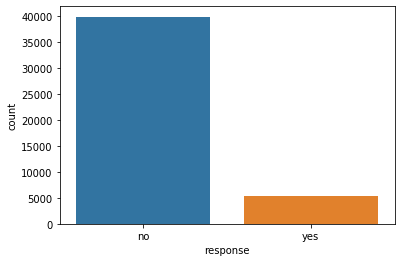

In [11]:
sns.countplot(df['response'])

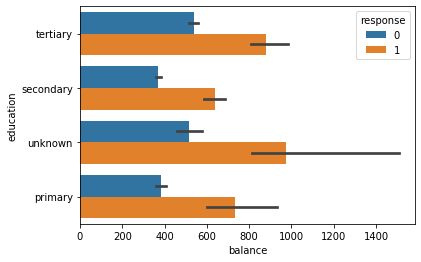

In [12]:
#Plot a horizontal bar graph with the median values of balance for each education level value. 
sns.barplot(y='education',x='balance', data = df1,hue='response',estimator=np.median)
# For all category highest median is 1 
#Which group has the highest median?
# tertiary educated people has highest median.

Percentage of -1 in pdays is 81.73674548229414


count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

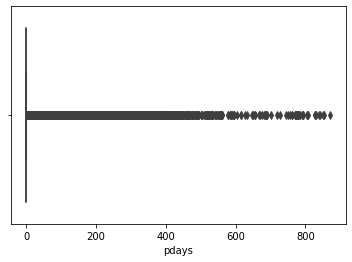

In [13]:
#Make a box plot for pdays.
sns.boxplot(df1['pdays'])
p = ((df1[df1['pdays']==-1].count()[0])/df1.shape[0])*100
print('Percentage of -1 in pdays is',p)
df1['pdays'].describe()
#Do you see any outliers?
#yes, 81% of values has -1. others are outliers

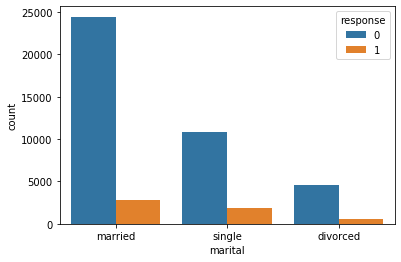

In [14]:
sns.countplot(df1['marital'],hue=df1['response'])

In [15]:
obj_col = df1.select_dtypes(object).columns
num_col = df1.select_dtypes(exclude=object).columns
obj_col

Index(['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan',
       'month', 'poutcome'],
      dtype='object')

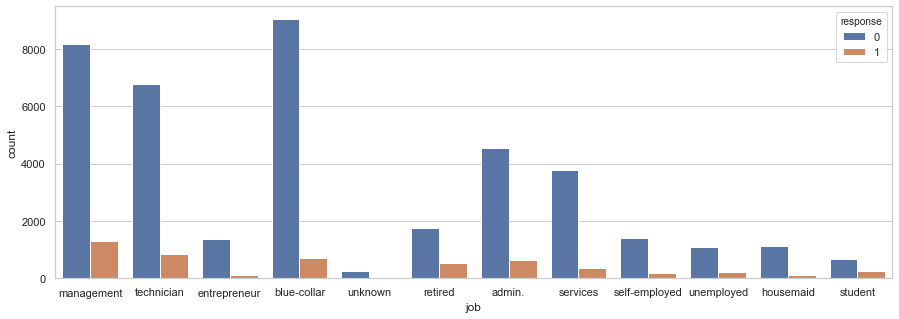

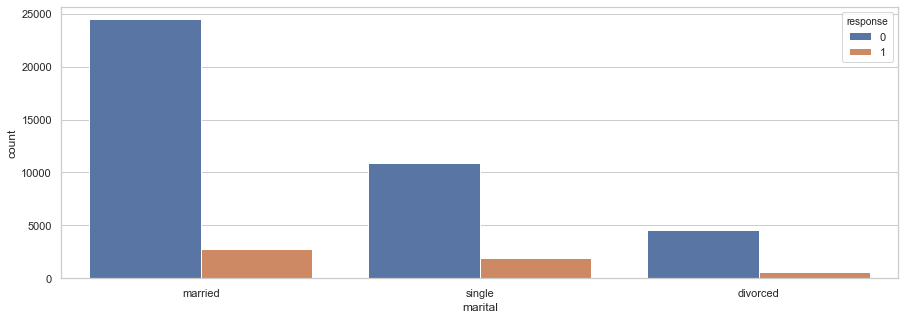

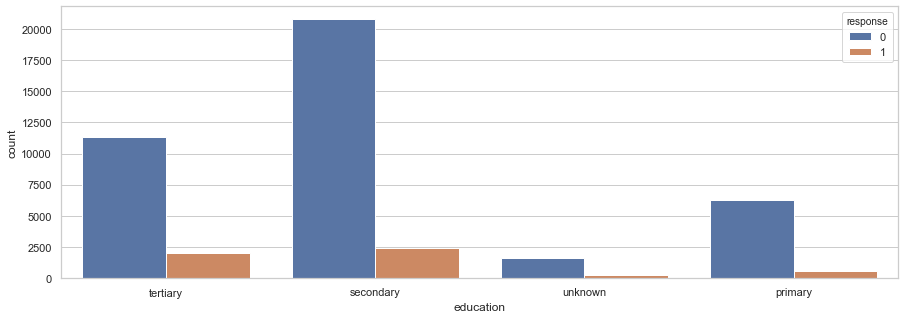

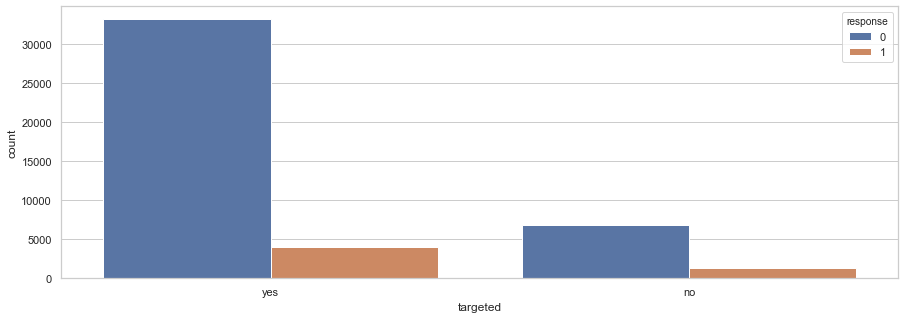

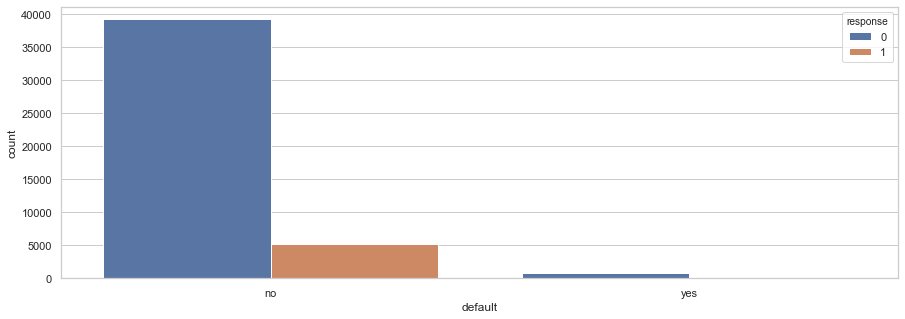

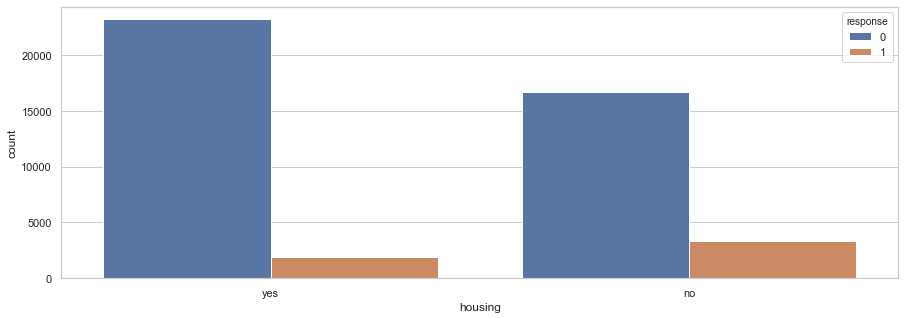

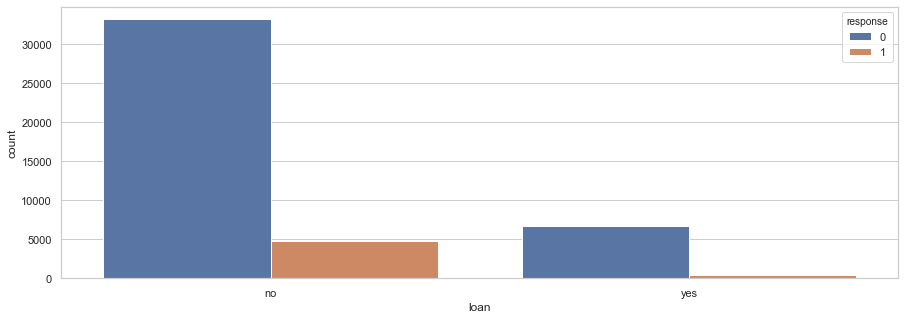

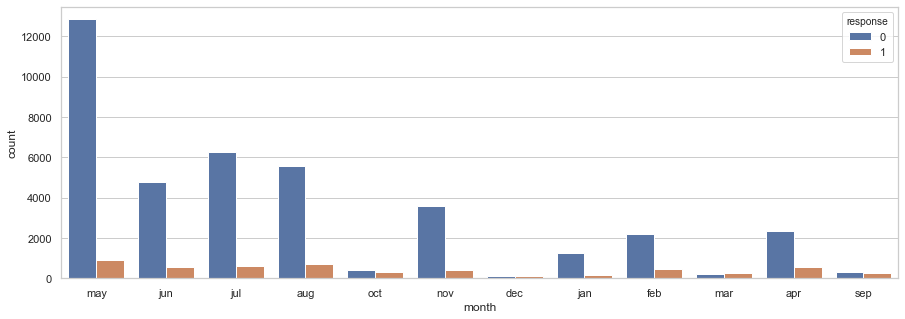

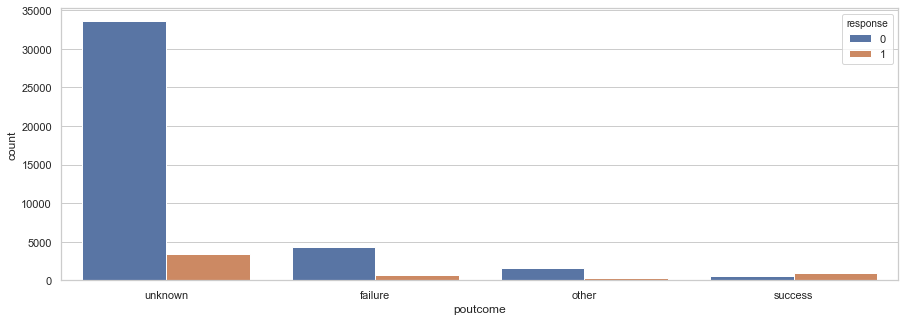

In [16]:
for i in obj_col:
    plt.figure(figsize=[15,5])
    sns.set(style="whitegrid")
    sns.countplot(x = i,hue = 'response',data=df1)
    plt.show()

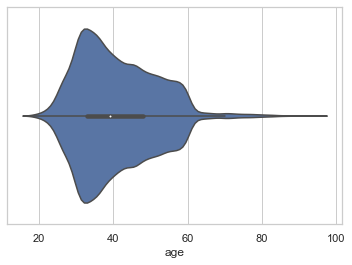

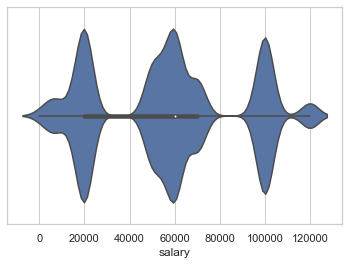

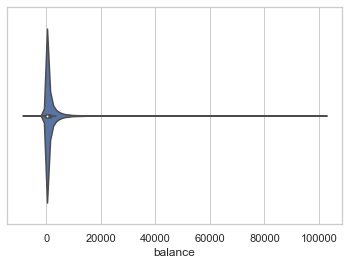

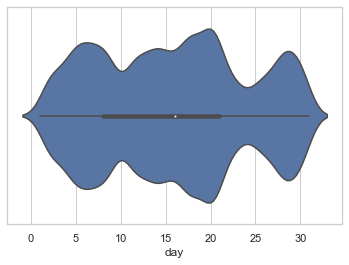

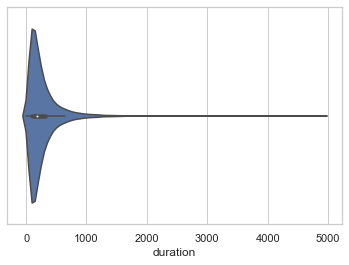

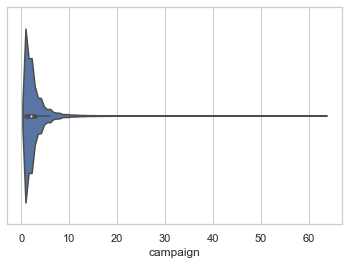

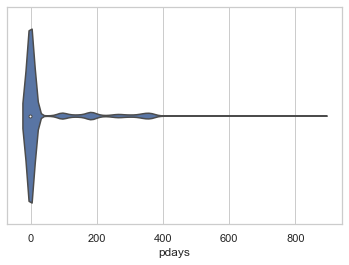

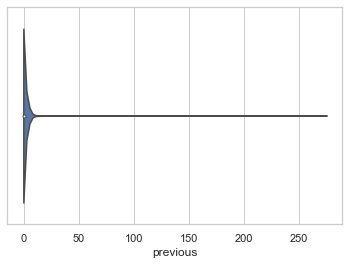

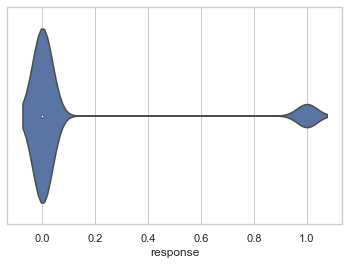

In [17]:
# to find outlier
for i in num_col:
    #plt.figure(figsize=[8,8])
    sns.set(style="whitegrid")
    sns.violinplot(df1[i])
    plt.show()    

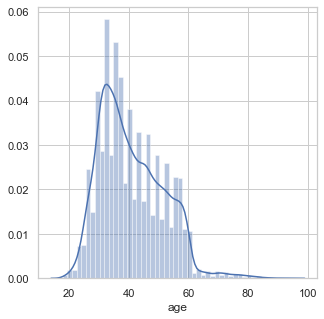

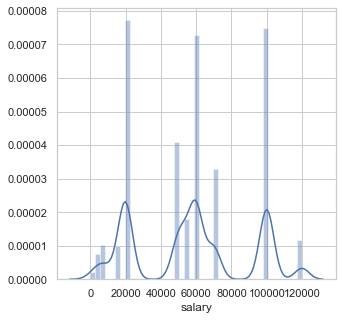

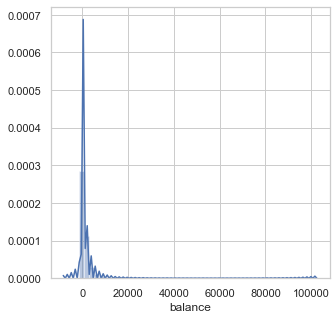

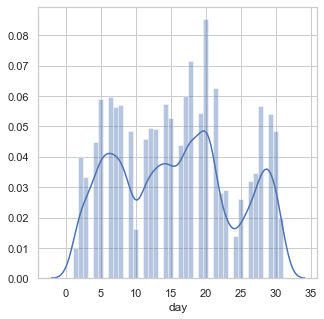

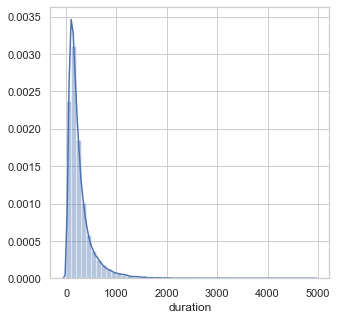

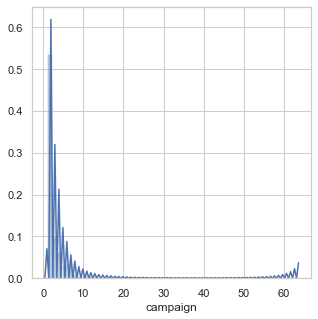

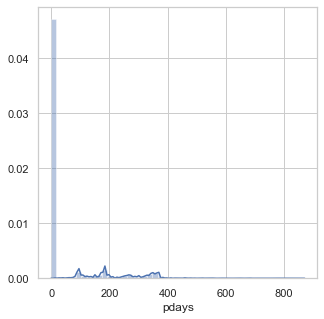

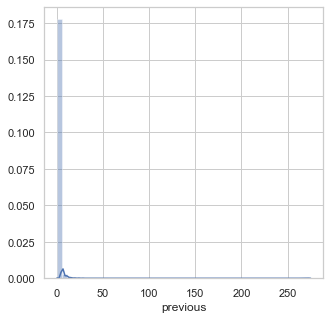

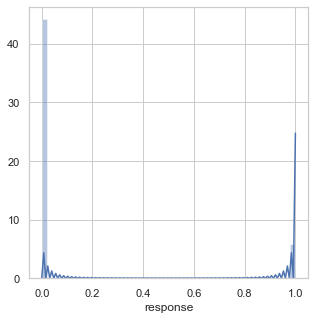

In [18]:
for i in num_col:
    plt.figure(figsize=[5,5])
    sns.set(style="whitegrid")
    sns.distplot(df1[i])
    plt.show()

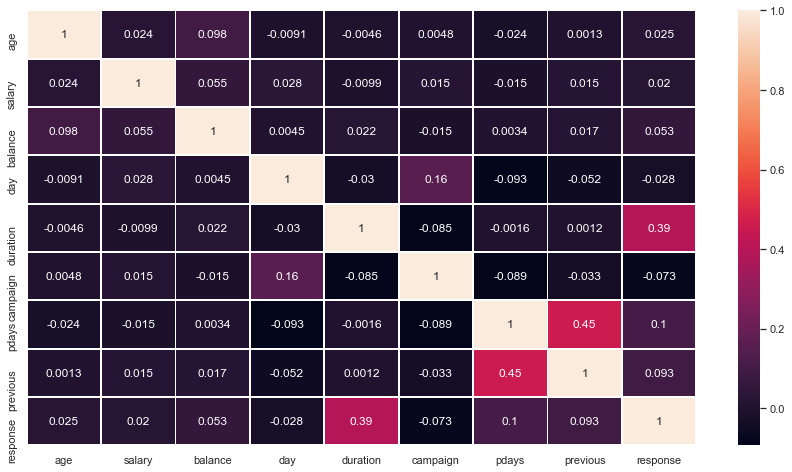

In [19]:
corr = df1.corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr,annot=True,linewidths=1)
#plt.figure(figsize=[20,20])

In [20]:
corr["response"].reset_index().sort_values(["response"], ascending=False)

,index,response
8,response,1.000000
4,duration,0.394521
6,pdays,0.103621
7,previous,0.093236
2,balance,0.052838
0,age,0.025155
1,salary,0.020012
3,day,-0.028348
5,campaign,-0.073172


By looking at the bar graph, we can observe that Feature vs Label the data is wide spread i.e. we cannot predict completely based on feature alone. 

#### Feature Engineering

- First, We can convert the duration from Seconds to Minutes and then making it as categorical feature.
- Converting the age of the person into categorical feature by segregating the age as Adult , Middle Aged and old.
- Similarly we can converting the continous feature value into discrete feature value.

# Catagorizing distributed values

In [21]:
df2 = df1.copy()
#df2.head()

In [22]:
# changing into convient form
df2['age'] = df2['age'].replace(to_replace= range(18,35) ,value= 'Adult')
df2['age'] = df2['age'].replace(to_replace= range(35,50) ,value= 'Middle_Age')
df2['age'] = df2['age'].replace(to_replace= range(50,100) ,value= 'Old_age')

#Pdays with -1 (not contacted)
df2['pdays_not_contacted'] = 0
df2.loc[df2['pdays'] == -1 ,'pdays_not_contacted'] = 1
# Replacing Pdays into month
df2['pmonths'] = abs(round(df2['pdays']/30))
df2 = df2.drop('pdays',axis=1) # droping pdays as we encoded it

#From Analysis on campaign high outlier above 30. so, I'm droping it
df1 = df1[df1['campaign']<40]
#From Analysis on Balance high outlier above 50000. so, I'm droping it
df1 = df1[df1['balance']<5000]

In [23]:
df2.describe()

,salary,balance,day,duration,campaign,previous,response,pdays_not_contacted,pmonths
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,57006.171065,1362.272058,15.806419,258.163080,2.763841,0.580323,0.116985,0.817367,1.364646
std,32085.718415,3044.765829,8.322476,257.527812,3.098021,2.303441,0.321406,0.386369,3.324886
min,0.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,20000.000000,72.000000,8.000000,103.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,60000.000000,448.000000,16.000000,180.000000,2.000000,0.000000,0.000000,1.000000,0.000000
75%,70000.000000,1428.000000,21.000000,319.000000,3.000000,0.000000,0.000000,1.000000,0.000000
max,120000.000000,102127.000000,31.000000,4918.000000,63.000000,275.000000,1.000000,1.000000,29.000000


In [24]:
for i in df2.columns:
    print (i)
    print(df2[i].unique())

age
['Old_age' 'Middle_Age' 'Adult']
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
salary
[100000  60000 120000  20000      0  55000  50000  70000   8000  16000
   4000]
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
targeted
['yes' 'no']
default
['no' 'yes']
balance
[ 2143    29     2 ...  8205 14204 16353]
housing
['yes' 'no']
loan
['no' 'yes']
day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration
[ 261  151   76 ... 1298 1246 1556]
campaign
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
previous
[  0   3   1   4   2  11  16   6   5  10  12   7  18   9  21   8  14  15
  26  37  13  25  20  27  17  23

Hence, all features where categorized

# Visualization

In [25]:
obj_col2 = df2.select_dtypes(object).columns
num_col2 = df2.select_dtypes(exclude=object).columns
obj_col2

Index(['age', 'job', 'marital', 'education', 'targeted', 'default', 'housing',
       'loan', 'month', 'poutcome'],
      dtype='object')

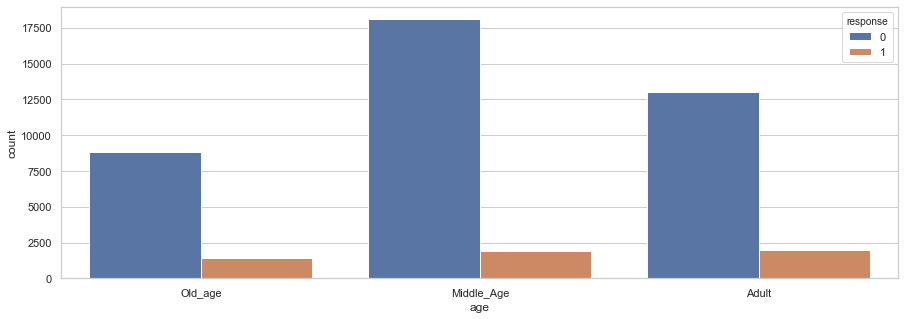

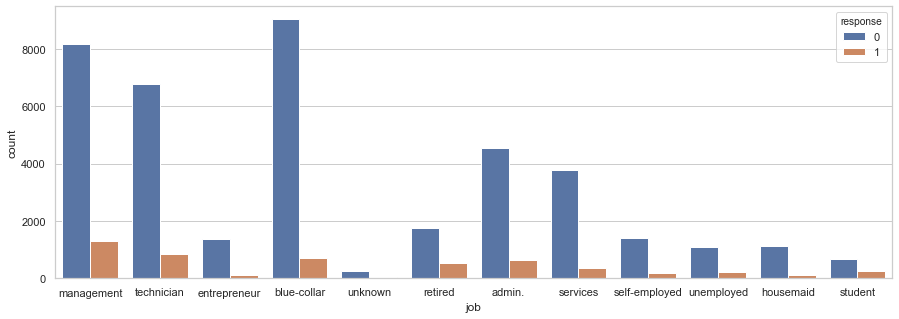

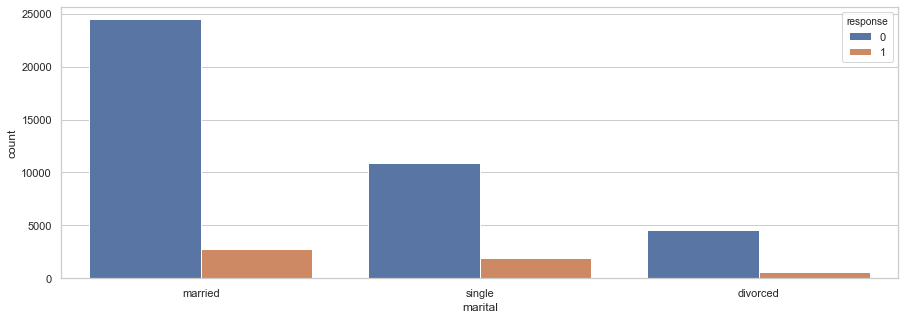

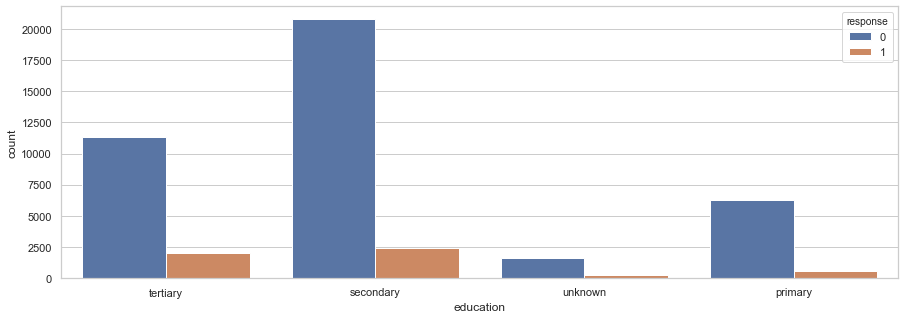

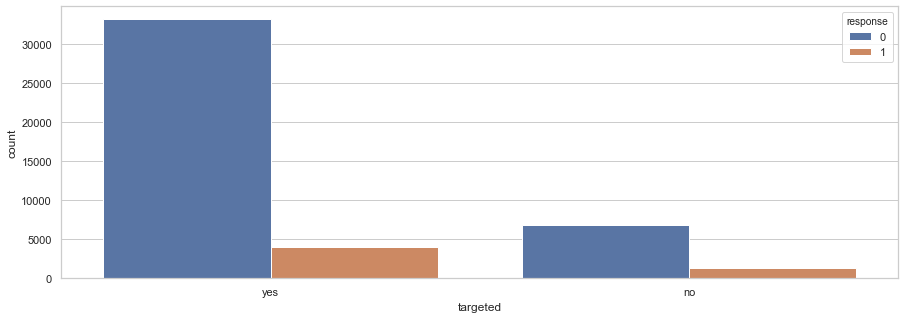

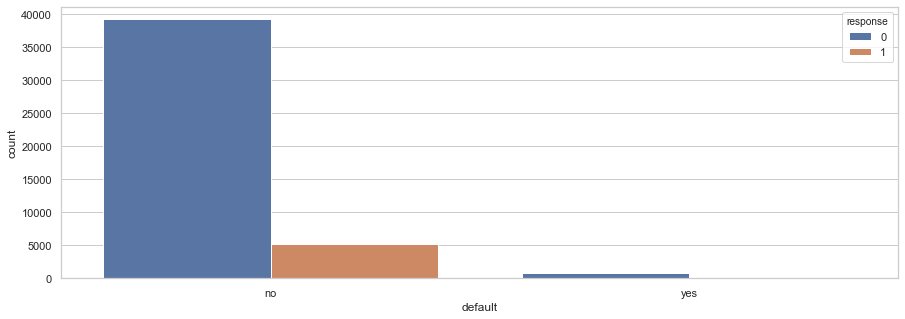

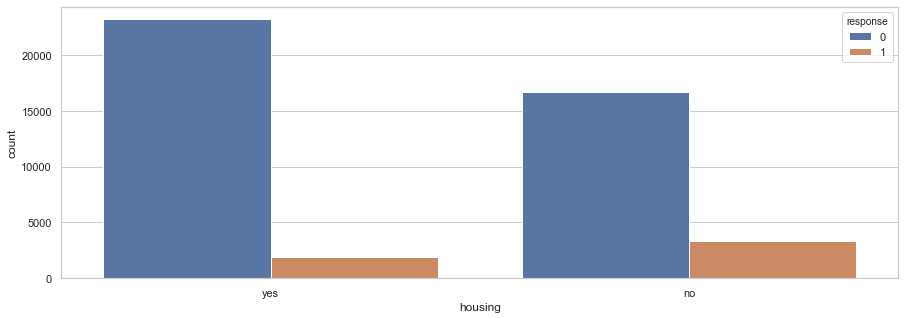

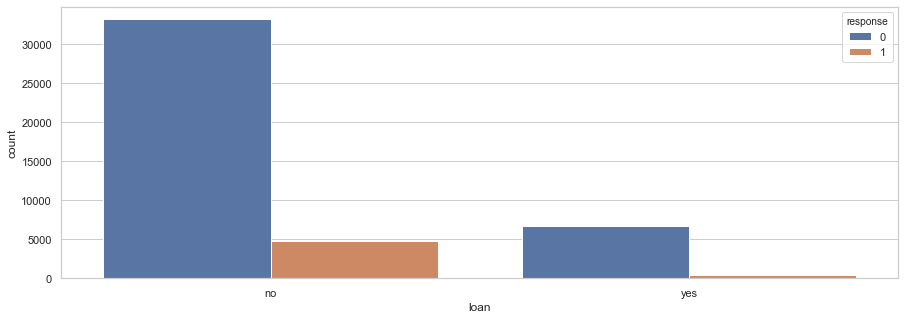

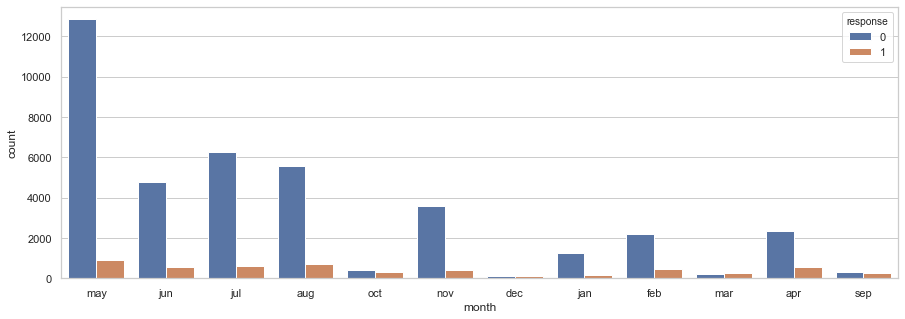

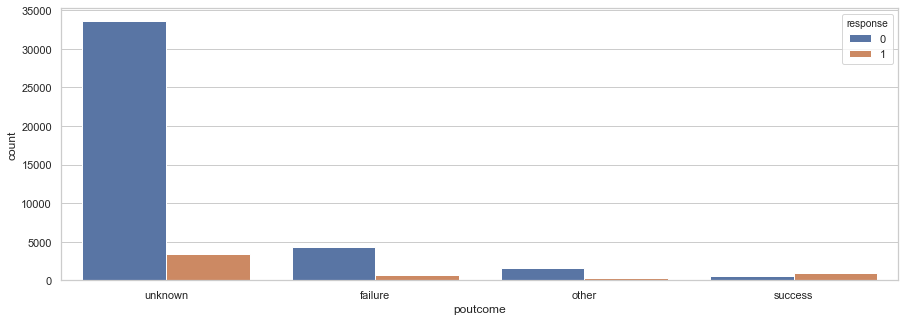

In [26]:
for i in obj_col2:
    plt.figure(figsize=[15,5])
    sns.set(style="whitegrid")
    sns.countplot(x = i,hue = 'response',data=df2)
    plt.show()

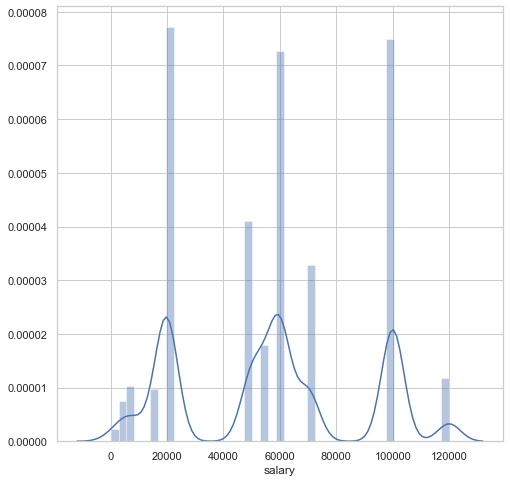

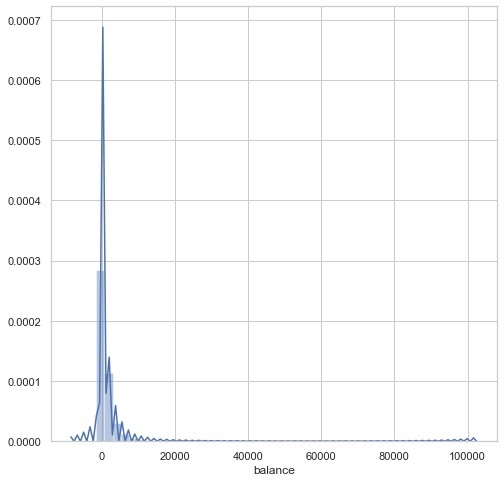

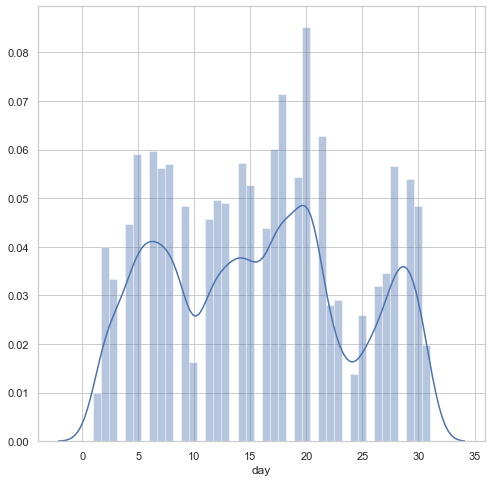

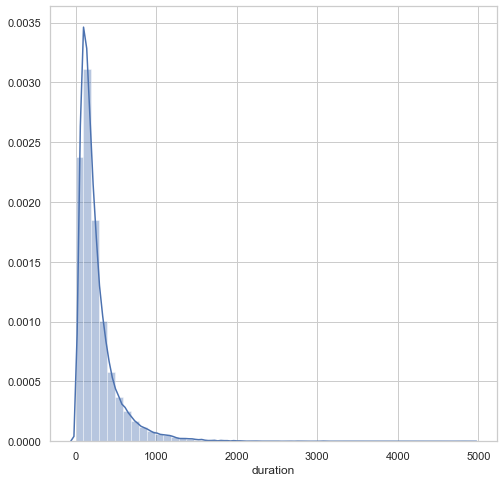

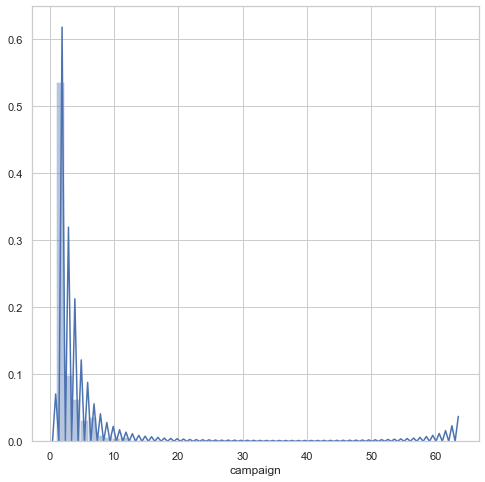

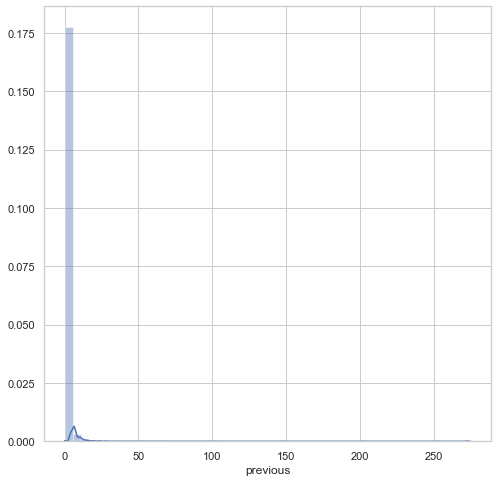

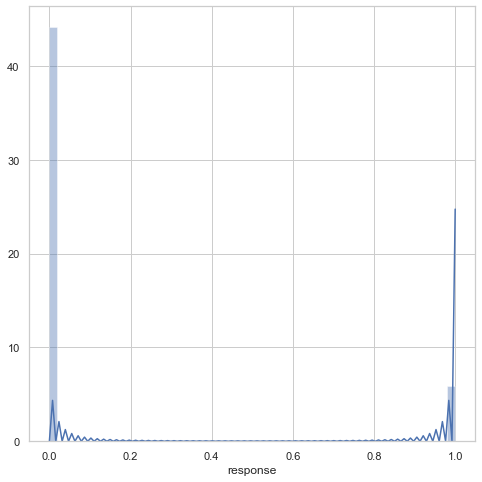

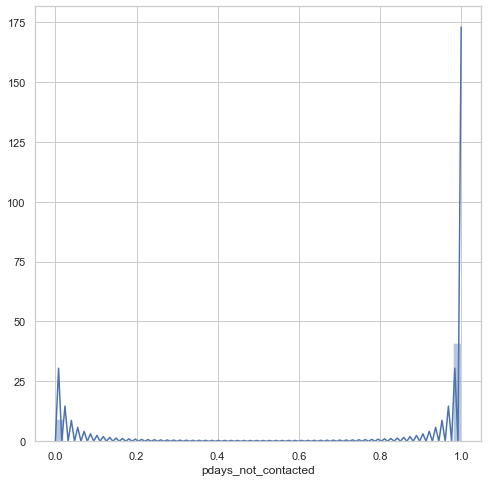

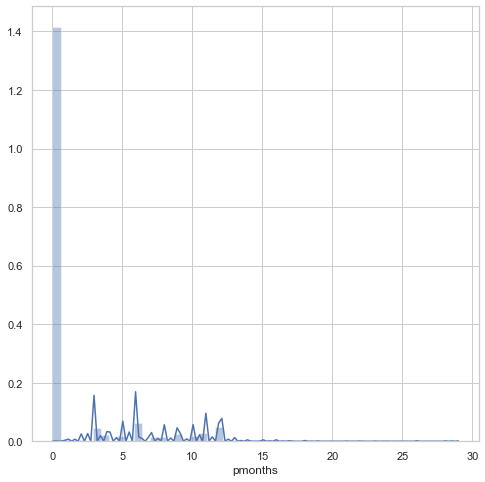

In [27]:
for i in num_col2:
    plt.figure(figsize=[8,8])
    sns.set(style="whitegrid")
    sns.distplot(df2[i])
    plt.show()

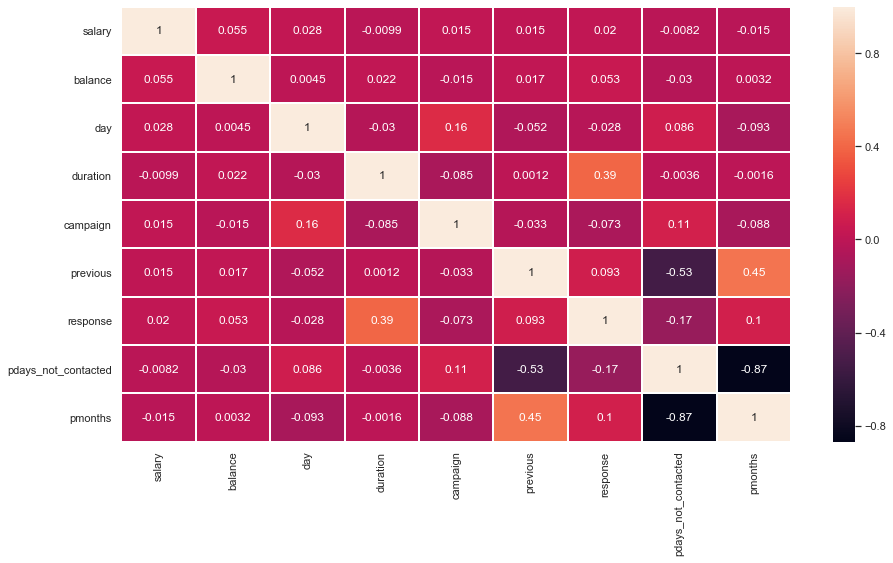

In [28]:
corr = df2.corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr,annot=True,linewidths=1)
#plt.figure(figsize=[20,20])

In [29]:
corr["response"].reset_index().sort_values(["response"], ascending=False)

,index,response
6,response,1.000000
3,duration,0.394521
8,pmonths,0.101927
5,previous,0.093236
1,balance,0.052838
0,salary,0.020012
2,day,-0.028348
4,campaign,-0.073172
7,pdays_not_contacted,-0.167263


Hence, duration is highly corrlated

In [30]:
data = df2.copy()

In [31]:
data['targeted'] = data['targeted'].map(dict(yes=1, no=0))
data['default'] = data['default'].map(dict(yes=1, no=0))
data['housing'] = data['housing'].map(dict(yes=1, no=0))
data['loan'] = data['loan'].map(dict(yes=1, no=0))
data = pd.get_dummies(data)
data.head()

,salary,targeted,default,balance,housing,loan,day,duration,campaign,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,100000,1,0,2143,1,0,5,261,1,0,...,0,0,1,0,0,0,0,0,0,1
1,60000,1,0,29,1,0,5,151,1,0,...,0,0,1,0,0,0,0,0,0,1
2,120000,1,0,2,1,1,5,76,1,0,...,0,0,1,0,0,0,0,0,0,1
3,20000,0,0,1506,1,0,5,92,1,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,0,0,5,198,1,0,...,0,0,1,0,0,0,0,0,0,1


In [32]:
X = data.drop('response',axis=1)
y = data[['response']]
#y.head()

Hence, all variables where converted into suitable categorical form

Most of the values were encoded sucessfully

# Our Model Target

 In this problem we need our target is to build model with __High Precision Score__ & with High Accuracy. Because new customer is way important.

### Choosen Metrics:
 - __Precision score__
 
### Reason
    We need to increase customer response. this is important for good business

### Importing Libraries for Machine Learning

In [33]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, confusion_matrix
#Importing libraries for Cross Validation & K-Folds
from sklearn.model_selection import KFold, cross_validate, cross_val_score
from sklearn.tree import export_graphviz

# Machine learning - Test & Train

In [34]:
# create training and testing vars
#X = data.drop('response',axis=1)
#y = data[["response"]]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40, random_state=100)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
#X.head()

(27126, 50) (27126, 1)
(18085, 50) (18085, 1)


In [35]:
X_test.head()

,salary,targeted,default,balance,housing,loan,day,duration,campaign,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
14789,20000,1,1,0,0,1,16,154,2,0,...,0,0,0,0,0,0,0,0,0,1
8968,100000,1,0,5,0,0,5,178,1,0,...,1,0,0,0,0,0,0,0,0,1
34685,100000,1,0,906,1,0,5,67,4,0,...,0,0,1,0,0,0,0,0,0,1
2369,50000,1,0,768,1,0,13,203,1,0,...,0,0,1,0,0,0,0,0,0,1
36561,70000,1,0,0,1,0,12,631,1,1,...,0,0,1,0,0,0,0,0,1,0


# Predictive Models

In [36]:
logreg = LogisticRegression()
ranfst = RandomForestClassifier(max_depth=50)

# Feature Selection

## RFE Model

In [37]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=5)

In [38]:
rfe = rfe.fit(X_train, y_train)

In [39]:
rank = rfe.ranking_
#print(rfe.ranking_)  


In [40]:
a = zip(X_train,rank)
rfe_col = pd.DataFrame(a, columns = ['Col', 'Rank']).sort_values("Rank")
top_col = list(rfe_col["Col"])

#print(top_col)
rfe_col[:10]

,Col,Rank
36,month_dec,1
45,month_sep,1
48,poutcome_success,1
44,month_oct,1
41,month_mar,1
34,month_apr,2
4,housing,3
23,job_student,4
49,poutcome_unknown,5
46,poutcome_failure,6


In [41]:
sel_fea = X_train.columns[rfe.ranking_<30]
sel_fea.size
# I have selected 15 features among 50

33

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
vif = pd.DataFrame()
vif['Features'] = X_train[sel_fea].columns
vif['VIF'] = [variance_inflation_factor(X_train[sel_fea].values, i) for i in range(X_train[sel_fea].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = True)
vif

,Features,VIF
1,default,1.01
6,job_entrepreneur,1.02
9,job_self-employed,1.02
11,job_unemployed,1.03
7,job_housemaid,1.05
3,loan,1.06
5,age_Middle_Age,1.09
10,job_student,1.09
8,job_retired,1.13
14,education_primary,1.17


In [44]:
vif_col = vif[:25]
col = list(vif_col["Features"])
print(col)

['default', 'job_entrepreneur', 'job_self-employed', 'job_unemployed', 'job_housemaid', 'loan', 'age_Middle_Age', 'job_student', 'job_retired', 'education_primary', 'housing', 'education_unknown', 'education_tertiary', 'marital_single', 'marital_married', 'targeted', 'pdays_not_contacted', 'poutcome_success', 'poutcome_other', 'poutcome_failure', 'month_sep', 'month_oct', 'month_nov', 'month_may', 'month_mar']


### P-Value

In [45]:
import statsmodels.api as sm

In [46]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
a = sm.add_constant(X_train[col])
b = y_train

In [47]:
model = sm.OLS(b, a)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     189.3
Date:                Tue, 31 Dec 2019   Prob (F-statistic):               0.00
Time:                        18:47:32   Log-Likelihood:                -5486.9
No. Observations:               27126   AIC:                         1.103e+04
Df Residuals:                   27100   BIC:                         1.124e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1880    

In [48]:
#results.pvalues['job_entrepreneur ']

col_pval = []
for i in col:
    a = round(results.pvalues[i],3)
    col_pval.append(a)
    
col_pval
a = zip(col,col_pval)
df_pval = pd.DataFrame(a, columns = ['Col', 'pval']).sort_values("pval")


In [49]:
sel_fea = list(df_pval[df_pval['pval'].between(0.0011,.05,inclusive= True)].Col)
sel_fea

['poutcome_success',
 'job_unemployed',
 'targeted',
 'marital_single',
 'education_unknown',
 'month_nov']

This were three variables: ['previous', 'targeted'] which is selected from P-value & from RFE

### K-Fold CV 

In [50]:
cv = KFold(n_splits=5, random_state=40, shuffle=False)
#for train_index, test_index in cv.split(X):
#    print("Train Index: ", train_index)
#    print("Test Index: ", test_index, "\n")

In [51]:
kf_df = pd.DataFrame(cv.split(X),columns=['train','test'])
kf_df

,train,test
0,"[9043, 9044, 9045, 9046, 9047, 9048, 9049, 905...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[9043, 9044, 9045, 9046, 9047, 9048, 9049, 905..."
2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[18085, 18086, 18087, 18088, 18089, 18090, 180..."
3,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[27127, 27128, 27129, 27130, 27131, 27132, 271..."
4,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[36169, 36170, 36171, 36172, 36173, 36174, 361..."


## Model - 1 : Logistic Regression

### 1.1 Predicts using all features

In [52]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
preds = logreg.predict(X_test)

In [54]:
con_mat = confusion_matrix(y_test,preds)
index = ['Actual No','Actual Yes']
col = ['Predicted No','Predicted Yes']
cf = pd.DataFrame(con_mat,index=index,columns=col)
cf

,Predicted No,Predicted Yes
Actual No,15700,261
Actual Yes,1829,295


In [55]:
sc = cross_val_score(logreg,X,y, cv=5, scoring='accuracy')
print('Cross Val score:',round(mean(sc),2))

Cross Val score: 0.88


In [56]:
print('Recall score:',round(recall_score(y_test,preds),2))
print('Precision score:',round(precision_score(y_test,preds),2))
print('Accuracy score:',round(accuracy_score(y_test,preds),2))

Recall score: 0.14
Precision score: 0.53
Accuracy score: 0.88


###  1.2 Predicts using selected features

In [57]:
logreg.fit(X_train[sel_fea],y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
preds = logreg.predict(X_test[sel_fea])

In [59]:
con_mat = confusion_matrix(y_test,preds)
index = ['Actual No','Actual Yes']
col = ['Predicted No','Predicted Yes']
cf = pd.DataFrame(con_mat,index=index,columns=col)
print('1.2 Logistic Reg. Prediction with selected features')
cf

1.2 Logistic Reg. Prediction with selected features


,Predicted No,Predicted Yes
Actual No,15743,218
Actual Yes,1734,390


In [60]:
print('Recall score:',round(recall_score(y_test,preds),2))
print('Precision score:',round(precision_score(y_test,preds),2))
print('Accuracy score:',round(accuracy_score(y_test,preds),2))

Recall score: 0.18
Precision score: 0.64
Accuracy score: 0.89


In [61]:
sc = cross_val_score(logreg,X[sel_fea],y, cv=5, scoring='accuracy')
print('Cross Val score:',round(mean(sc),2))

Cross Val score: 0.89


### 1.3 Logistic reg for all kfolds

In [62]:
rec_sco_log = []
pre_sco_log = []
acc_sco_log = []

for i,j in cv.split(X):
    X_train, X_test, y_train, y_test = X.loc[i], X.loc[j], y.loc[i], y.loc[j]
    logreg.fit(X_train,y_train)
    preds = logreg.predict(X_test)
    s1 = round(recall_score(y_test,preds))
    s2 = round(precision_score(y_test,preds),2)
    s3 = round(accuracy_score(y_test,preds),2)
    rec_sco_log.append(s1)
    pre_sco_log.append(s2)
    acc_sco_log.append(s3)

print('Recall score:',rec_sco_log)
print('Precision score:',pre_sco_log)
print('Accuracy score:',acc_sco_log, '\n')
print('Average Recall score:',mean(rec_sco_log))
print('Average Precision score:',mean(pre_sco_log))
print('Average Accuracy score:',mean(acc_sco_log))

Recall score: [0.0, 0.0, 0.0, 0.0, 0.0]
Precision score: [0.51, 0.48, 0.56, 0.52, 0.67]
Accuracy score: [0.97, 0.94, 0.94, 0.88, 0.69] 

Average Recall score: 0.0
Average Precision score: 0.548
Average Accuracy score: 0.884


In [63]:
c = []
for i,j in cv.split(X):
    X_train, X_test, y_train, y_test = X.loc[i][sel_fea], X.loc[j][sel_fea], y.loc[i], y.loc[j]
    logreg.fit(X_train,y_train)
    preds = logreg.predict(X_test)
    con_mat = confusion_matrix(y_test,preds)
    c.append(con_mat)
    #index = ['Actual No','Actual Yes']
    #col = ['Predicted No','Predicted Yes']
    #cf = pd.DataFrame(con_mat,index=index,columns=col)
    #c.append(cf)
    print(c)

[array([[8739,    0],
       [ 304,    0]], dtype=int64)]
[array([[8739,    0],
       [ 304,    0]], dtype=int64), array([[8534,    0],
       [ 508,    0]], dtype=int64)]
[array([[8739,    0],
       [ 304,    0]], dtype=int64), array([[8534,    0],
       [ 508,    0]], dtype=int64), array([[8454,   33],
       [ 550,    5]], dtype=int64)]
[array([[8739,    0],
       [ 304,    0]], dtype=int64), array([[8534,    0],
       [ 508,    0]], dtype=int64), array([[8454,   33],
       [ 550,    5]], dtype=int64), array([[7873,  103],
       [ 997,   69]], dtype=int64)]
[array([[8739,    0],
       [ 304,    0]], dtype=int64), array([[8534,    0],
       [ 508,    0]], dtype=int64), array([[8454,   33],
       [ 550,    5]], dtype=int64), array([[7873,  103],
       [ 997,   69]], dtype=int64), array([[6182,    4],
       [2847,    9]], dtype=int64)]


### 1.4 Logistic reg for selected kfolds

In [64]:
rec_sco_log = []
pre_sco_log = []
acc_sco_log = []

for i,j in cv.split(X[sel_fea]):
    X_train, X_test, y_train, y_test = X.loc[i][sel_fea], X.loc[j][sel_fea], y.loc[i], y.loc[j]
    logreg.fit(X_train,y_train)
    preds = logreg.predict(X_test)
    s1 = round(recall_score(y_test,preds))
    s2 = round(precision_score(y_test,preds),2)
    s3 = round(accuracy_score(y_test,preds),2)
    rec_sco_log.append(s1)
    pre_sco_log.append(s2)
    acc_sco_log.append(s3)

print('Recall score:',rec_sco_log)
print('Precision score:',pre_sco_log)
print('Accuracy score:',acc_sco_log, '\n')
print('Average Recall score:',mean(rec_sco_log))
print('Average Precision score:',mean(pre_sco_log))
print('Average Accuracy score:',mean(acc_sco_log))

Recall score: [0.0, 0.0, 0.0, 0.0, 0.0]
Precision score: [0.0, 0.0, 0.13, 0.4, 0.69]
Accuracy score: [0.97, 0.94, 0.94, 0.88, 0.68] 

Average Recall score: 0.0
Average Precision score: 0.244
Average Accuracy score: 0.882


In [65]:
c = []
for i,j in cv.split(X[sel_fea]):
    X_train, X_test, y_train, y_test = X.loc[i][sel_fea], X.loc[j][sel_fea], y.loc[i], y.loc[j]
    logreg.fit(X_train,y_train)
    preds = logreg.predict(X_test)
    con_mat = confusion_matrix(y_test,preds)
    c.append(con_mat)
    #index = ['Actual No','Actual Yes']
    #col = ['Predicted No','Predicted Yes']
    #cf = pd.DataFrame(con_mat,index=index,columns=col)
    #c.append(cf)
    print(c)

[array([[8739,    0],
       [ 304,    0]], dtype=int64)]
[array([[8739,    0],
       [ 304,    0]], dtype=int64), array([[8534,    0],
       [ 508,    0]], dtype=int64)]
[array([[8739,    0],
       [ 304,    0]], dtype=int64), array([[8534,    0],
       [ 508,    0]], dtype=int64), array([[8454,   33],
       [ 550,    5]], dtype=int64)]
[array([[8739,    0],
       [ 304,    0]], dtype=int64), array([[8534,    0],
       [ 508,    0]], dtype=int64), array([[8454,   33],
       [ 550,    5]], dtype=int64), array([[7873,  103],
       [ 997,   69]], dtype=int64)]
[array([[8739,    0],
       [ 304,    0]], dtype=int64), array([[8534,    0],
       [ 508,    0]], dtype=int64), array([[8454,   33],
       [ 550,    5]], dtype=int64), array([[7873,  103],
       [ 997,   69]], dtype=int64), array([[6182,    4],
       [2847,    9]], dtype=int64)]


Hence, 1st fold provide high accuracy score. 

so, I'm going to use 1st fold with selected features

### 1.5 Log reg for selected K-Folds with selected Features

In [66]:
d = kf_df.iloc[4] # selected 1st index
#assigning index
i = d['train']
j = d['test']
# test & train
X_train1, X_test1, y_train1, y_test1 = X.iloc[i][sel_fea], X.loc[j][sel_fea], y.loc[i], y.loc[j]
#fitting model
logreg.fit(X_train1,y_train1)
# Predicting model
preds = logreg.predict(X_test1)
s1 = round(recall_score(y_test1,preds),2)
s2 = round(precision_score(y_test1,preds),2)
s3 = round(accuracy_score(y_test1,preds),2)

print('Recall score:',s1)
print('Precision score:',s2)
print('Accuracy score:',s3)

Recall score: 0.0
Precision score: 0.69
Accuracy score: 0.68


## Colclusion from Logistic Regression model

##### From Logistic Regression:

1.1 From all aplicable features
 - __Precision score__ : 53%
 - __Accuracy score__  : 88%
 
1.2 From all selected features
  - __Precision score__ : 64%
  - __Accuracy score__  : 89%
 
1.3 For K-fold For all aplicable features:
  - Average __Precision score__ : 55%
  - Average __Accuracy score__  : 88%
 
1.4 For K-fold For all selected features:
  - Average __Precision score__ : 24%
  - Average __Accuracy score__  : 88%

1.5 With selected features & best K-Fold:
  - __Precision score__ : 69%
  - __Accuracy score__  : 68%
  
From all report from various Logistic Regression model, i prefer to choose 1.2: __Logistic Regression model with selected Features__.

## Model - 2:  Random Forest 

### 2.1 Predicts using all features 

In [67]:
ranfst.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
preds = ranfst.predict(X_test)

In [69]:
con_mat = confusion_matrix(y_test,preds)
index = ['Actual No','Actual Yes']
col = ['Predicted No','Predicted Yes']
cf = pd.DataFrame(con_mat,index=index,columns=col)
cf

,Predicted No,Predicted Yes
Actual No,6115,71
Actual Yes,2700,156


In [70]:
print('Recall score:',round(recall_score(y_test,preds),2))
print('Precision score:',round(precision_score(y_test,preds),2))
print('Accuracy score:',round(accuracy_score(y_test,preds),2))

Recall score: 0.05
Precision score: 0.69
Accuracy score: 0.69


In [71]:
sc = cross_val_score(ranfst,X,y, cv=5, scoring='accuracy')
print('Cross Val score:',round(mean(sc),2))

Cross Val score: 0.69


### 2.2 Random Forest for Selected Feature

In [72]:
ranfst.fit(X_train[sel_fea],y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
preds = ranfst.predict(X_test[sel_fea])

In [74]:
con_mat = confusion_matrix(y_test,preds)
index = ['Actual No','Actual Yes']
col = ['Predicted No','Predicted Yes']
cf = pd.DataFrame(con_mat,index=index,columns=col)
print('2.2 Random Forest for Selected Feature')
cf

2.2 Random Forest for Selected Feature


,Predicted No,Predicted Yes
Actual No,6114,72
Actual Yes,2697,159


In [75]:
print('Recall score:',round(recall_score(y_test,preds),2))
print('Precision score:',round(precision_score(y_test,preds),2))
print('Accuracy score:',round(accuracy_score(y_test,preds),2))

Recall score: 0.06
Precision score: 0.69
Accuracy score: 0.69


In [76]:
sc = cross_val_score(ranfst,X[sel_fea],y, cv=5, scoring='accuracy')
print('Cross Val score:',round(mean(sc),2))

Cross Val score: 0.89


### Random Forest for all kfolds

In [77]:
rec_sco_log = []
pre_sco_log = []
acc_sco_log = []

for i,j in cv.split(X):
    X_train, X_test, y_train, y_test = X.loc[i], X.loc[j], y.loc[i], y.loc[j]
    ranfst.fit(X_train,y_train)
    preds = ranfst.predict(X_test)
    s1 = round(recall_score(y_test,preds),2)
    s2 = round(precision_score(y_test,preds),2)
    s3 = round(accuracy_score(y_test,preds),2)
    rec_sco_log.append(s1)
    pre_sco_log.append(s2)
    acc_sco_log.append(s3)

print('Recall score:',rec_sco_log)
print('Precision score:',pre_sco_log)
print('Accuracy score:',acc_sco_log, '\n')
print('Average Recall score:',mean(rec_sco_log))
print('Average Precision score:',mean(pre_sco_log))
print('Average Accuracy score:',mean(acc_sco_log))

Recall score: [0.37, 0.34, 0.42, 0.41, 0.12]
Precision score: [0.34, 0.34, 0.22, 0.32, 0.59]
Accuracy score: [0.95, 0.93, 0.87, 0.83, 0.7] 

Average Recall score: 0.332
Average Precision score: 0.362
Average Accuracy score: 0.856


In [78]:
c = []
for i,j in cv.split(X):
    X_train, X_test, y_train, y_test = X.loc[i][sel_fea], X.loc[j][sel_fea], y.loc[i], y.loc[j]
    ranfst.fit(X_train,y_train)
    preds = ranfst.predict(X_test)
    con_mat = confusion_matrix(y_test,preds)
    c.append(con_mat)
    #index = ['Actual No','Actual Yes']
    #col = ['Predicted No','Predicted Yes']
    #cf = pd.DataFrame(con_mat,index=index,columns=col)
    #c.append(cf)
    print(c)

[array([[8739,    0],
       [ 304,    0]], dtype=int64)]
[array([[8739,    0],
       [ 304,    0]], dtype=int64), array([[8534,    0],
       [ 508,    0]], dtype=int64)]
[array([[8739,    0],
       [ 304,    0]], dtype=int64), array([[8534,    0],
       [ 508,    0]], dtype=int64), array([[8440,   47],
       [ 549,    6]], dtype=int64)]
[array([[8739,    0],
       [ 304,    0]], dtype=int64), array([[8534,    0],
       [ 508,    0]], dtype=int64), array([[8440,   47],
       [ 549,    6]], dtype=int64), array([[7874,  102],
       [ 997,   69]], dtype=int64)]
[array([[8739,    0],
       [ 304,    0]], dtype=int64), array([[8534,    0],
       [ 508,    0]], dtype=int64), array([[8440,   47],
       [ 549,    6]], dtype=int64), array([[7874,  102],
       [ 997,   69]], dtype=int64), array([[6115,   71],
       [2700,  156]], dtype=int64)]


### Random Forest for selected kfolds

In [79]:
rec_sco_log = []
pre_sco_log = []
acc_sco_log = []

for i,j in cv.split(X[sel_fea]):
    X_train, X_test, y_train, y_test = X.loc[i][sel_fea], X.loc[j][sel_fea], y.loc[i], y.loc[j]
    ranfst.fit(X_train,y_train)
    preds = ranfst.predict(X_test)
    s1 = round(recall_score(y_test,preds),2)
    s2 = round(precision_score(y_test,preds),2)
    s3 = round(accuracy_score(y_test,preds),2)
    rec_sco_log.append(s1)
    pre_sco_log.append(s2)
    acc_sco_log.append(s3)

print('Recall score:',rec_sco_log)
print('Precision score:',pre_sco_log)
print('Accuracy score:',acc_sco_log, '\n')
print('Average Recall score:',mean(rec_sco_log))
print('Average Precision score:',mean(pre_sco_log))
print('Average Accuracy score:',mean(acc_sco_log))

Recall score: [0.0, 0.0, 0.01, 0.06, 0.06]
Precision score: [0.0, 0.0, 0.11, 0.4, 0.69]
Accuracy score: [0.97, 0.94, 0.93, 0.88, 0.69] 

Average Recall score: 0.026
Average Precision score: 0.24
Average Accuracy score: 0.882


In [80]:
c = []
for i,j in cv.split(X[sel_fea]):
    X_train, X_test, y_train, y_test = X.loc[i][sel_fea], X.loc[j][sel_fea], y.loc[i], y.loc[j]
    ranfst.fit(X_train,y_train)
    preds = ranfst.predict(X_test)
    con_mat = confusion_matrix(y_test,preds)
    c.append(con_mat)
    #index = ['Actual No','Actual Yes']
    #col = ['Predicted No','Predicted Yes']
    #cf = pd.DataFrame(con_mat,index=index,columns=col)
    #c.append(cf)
    print(c)


[array([[8739,    0],
       [ 304,    0]], dtype=int64)]
[array([[8739,    0],
       [ 304,    0]], dtype=int64), array([[8534,    0],
       [ 508,    0]], dtype=int64)]
[array([[8739,    0],
       [ 304,    0]], dtype=int64), array([[8534,    0],
       [ 508,    0]], dtype=int64), array([[8439,   48],
       [ 549,    6]], dtype=int64)]
[array([[8739,    0],
       [ 304,    0]], dtype=int64), array([[8534,    0],
       [ 508,    0]], dtype=int64), array([[8439,   48],
       [ 549,    6]], dtype=int64), array([[7874,  102],
       [ 997,   69]], dtype=int64)]
[array([[8739,    0],
       [ 304,    0]], dtype=int64), array([[8534,    0],
       [ 508,    0]], dtype=int64), array([[8439,   48],
       [ 549,    6]], dtype=int64), array([[7874,  102],
       [ 997,   69]], dtype=int64), array([[6104,   82],
       [2665,  191]], dtype=int64)]


### 2.5 Random Forest for selected K-Folds with selected Features

In [81]:
d = kf_df.iloc[4] # selected 1st index
#assigning index
i = d['train']
j = d['test']
# test & train
X_train1, X_test1, y_train1, y_test1 = X.iloc[i][sel_fea], X.loc[j][sel_fea], y.loc[i], y.loc[j]
#fitting model
ranfst.fit(X_train1,y_train1)
# Predicting model
preds = ranfst.predict(X_test1)
s1 = round(recall_score(y_test1,preds))
s2 = round(precision_score(y_test1,preds),3)
s3 = round(accuracy_score(y_test1,preds),3)

print('Recall score:',s1)
print('Precision score:',s2)
print('Accuracy score:',s3)

Recall score: 0.0
Precision score: 0.702
Accuracy score: 0.696


In [82]:
con_mat = confusion_matrix(y_test,preds)
index = ['Actual No','Actual Yes']
col = ['Predicted No','Predicted Yes']
cf = pd.DataFrame(con_mat,index=index,columns=col)
cf

,Predicted No,Predicted Yes
Actual No,6104,82
Actual Yes,2663,193


# Correlation

In [83]:
sel_fea
sel_fea.append('response')
sel_fea

['poutcome_success',
 'job_unemployed',
 'targeted',
 'marital_single',
 'education_unknown',
 'month_nov',
 'response']

In [84]:
corr = data[sel_fea].corr()
corr["response"].reset_index().sort_values(["response"], ascending=False)

,index,response
6,response,1.000000
0,poutcome_success,0.306788
3,marital_single,0.063526
1,job_unemployed,0.020390
4,education_unknown,0.012053
5,month_nov,-0.014937
2,targeted,-0.069039


## Colclusion from Random Forest Model

##### From Random Forest:

2.1 From all aplicable features
 - __Precision score__ : 69%
 - __Accuracy score__  : 69%
 
2.2 From all selected features
  - __Precision score__ : 70%
  - __Accuracy score__  : 70%
 
2.3 For K-fold Fro all aplicable features:
  - Average __Precision score__ : 37%
  - Average __Accuracy score__  : 84%
 
2.4 For K-fold Fro all selected features:
  - Average __Precision score__ : 24%
  - Average __Accuracy score__  : 88%

2.5 With selected features & best K-Fold:
  - __Precision score__ : 69%
  - __Accuracy score__  : 69%
  
From all report from various Random Forest model, i prefer to choose 2.2: __Random Forest model with selected Features__.

# Result

### From Logistic Regression

1.2 From all selected features
        Precision score : 64%
        Accuracy score  : 89%
 
### From Random Forest: 
2.2 From all selected features
        Precision score : 70%
        Accuracy score  : 70%
        

.
.


From both statement, Both presision score & accuracy score is high in 2.2 - __Random Forest with selected features__ is the best model.